## Addestramento di un perceptron tramite scikit-learn

Passiamo a un implementazione più 'profesisonale' utilizzando la libreria scikit-learn per implementare il perceptron vedremo come le due implementazioni si somigliano molto. Prima di farlo utlizzzando sempre la stessa libreria facciamo un po' di pre-elaborazione dati. Infine plottiamo il grafico delle regioni decisionali aggiungendo un cerchio attorno ai dati di test
*(pag 45:48)*

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # assegno a X le due colonne di sepal e petal lenght
y = iris.target # assegno a y i risultati già normalizzati in interi, pittosto che stringhe

# dividiamo i due vettori in test e train, 30% del dataset diventa di test e il restante di train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

sc = StandardScaler()
sc.fit(X_train) # stima media e deviazione standard dei dati

X_train_std = sc.transform(X_train) # standardizzazione dei dati secondo la formula del primo capitolo (pag. 35)
X_test_std = sc.transform(X_test)

[[5.1 2.4]
 [4.  1. ]
 [1.4 0.2]
 [6.3 1.8]
 [1.5 0.2]]
[[ 0.70793846  1.51006688]
 [ 0.09545238 -0.29318114]
 [-1.35224199 -1.32360858]
 [ 1.37610509  0.7372463 ]
 [-1.29656144 -1.32360858]]


In [36]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0) # random state fa sì che i dati vengano mescolati a ogni epoch
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
y_pred = ppn.predict(X_test_std)
print("Missclassified samples: %d" % (y_test!=y_pred).sum())

print('Accuracy:', accuracy_score(y_test, y_pred))

Missclassified samples: 5
Accuracy: 0.8888888888888888


In [62]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker =markers[idx], label=cl)
    
    # tutto il codice sopra è commentato nel capitolo 1 
    if test_idx:
        # test_idx è un intervallo che comprende tutti i dati di test, quindi in X_test e y_test ora ho solo i 
        # dati che sono di test, a cui voglio aggiungere il circoletto
        X_test, y_test = X[test_idx, :], y[test_idx] 
        # un grafico a dispersione di cerchietti non colorati internamente per marchiare i test datas
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=1.0, linewidths=1,
                    marker='o', s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
<ipython-input-62-45829705956e>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an e

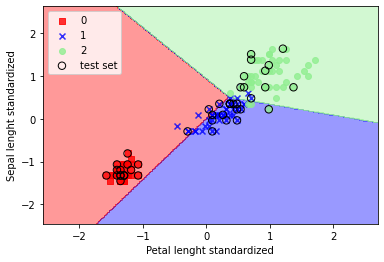

In [63]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('Petal lenght standardized')
plt.ylabel('Sepal lenght standardized')
plt.legend()
plt.show()